# Subplotting

Sometimes we need more than one plot, we might want to compare 3 similar graphs or show an evolution.  
To do so we can create subplots in our `figure` object to create a **grid** of plots.

<img src="https://matplotlib.org/stable/_images/sphx_glr_axes_margins_001.png" alt="subplot" width=400>

### Side by side plot

Change the following code to show the two barplots **side by side**.
To do this use the [plt.subplots()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) function.

<details>
  <summary>💡Hint</summary>
  <p>You will need to use axes.</p>
</details>

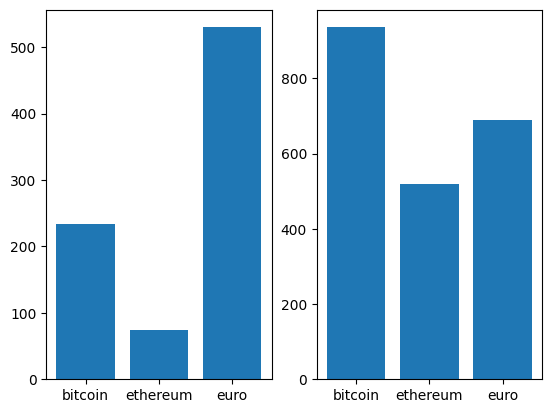

In [9]:
import matplotlib.pyplot as plt
import numpy as np

wallet_2015 = {"currency": ["bitcoin","ethereum","euro"], "value_in_euro": [234,74,530]}
wallet_2020 = {"currency": ["bitcoin","ethereum","euro"], "value_in_euro": [234*4,74*7,530*1.3]}

fig, axes = plt.subplots(1, 2)

axes[0].bar(wallet_2015["currency"], wallet_2015["value_in_euro"])
axes[1].bar(wallet_2020["currency"], wallet_2020["value_in_euro"])

plt.show()

### Matrix plot

Execute the cell below to load the data.

In [10]:
import pandas as pd
url = "https://wagon-public-datasets.s3.amazonaws.com/02-Data-Toolkit/03-Data-Visualization/currency.csv"
wallets = pd.read_csv(url, index_col='year')
wallets

,currency,bitcoin,ethereum
year,,,
2015,234.0,74.0,530.0
2016,187.2,51.8,583.0
2017,351.0,148.0,583.0
2018,468.0,296.0,795.0
2019,702.0,444.0,742.0
2020,936.0,518.0,689.0


In [24]:
wallets.iloc[0]

currency    234.0
bitcoin      74.0
ethereum    530.0
Name: 2015, dtype: float64

In [27]:
wallets.index[0]

2015

Make a 2 by 3 plot to show the prices for each year individually like in the example below.

<img src="https://wagon-public-datasets.s3.amazonaws.com/data-science-images/02-Data-Toolkit/03-Data-Visualization/subplot-two-by-three.png" alt="subplot" width=400>

You can again use the `plt.subplots()`.

Remember the DRY principle? Don't Repeat Yourself: do not write 6 very similar lines of code. Be smarter!

<details>
  <summary>💡Hint</summary>

  Inspect the `axes` object that `plt.subplots()` returns.
  It's a NumPy array of AxesSubplot, with a shape of 2 by 3. If you flatten it, you can easily loop over it to plot your charts.

  ```
  for i, ax in enumerate(axes.flatten):
  ```

</details>

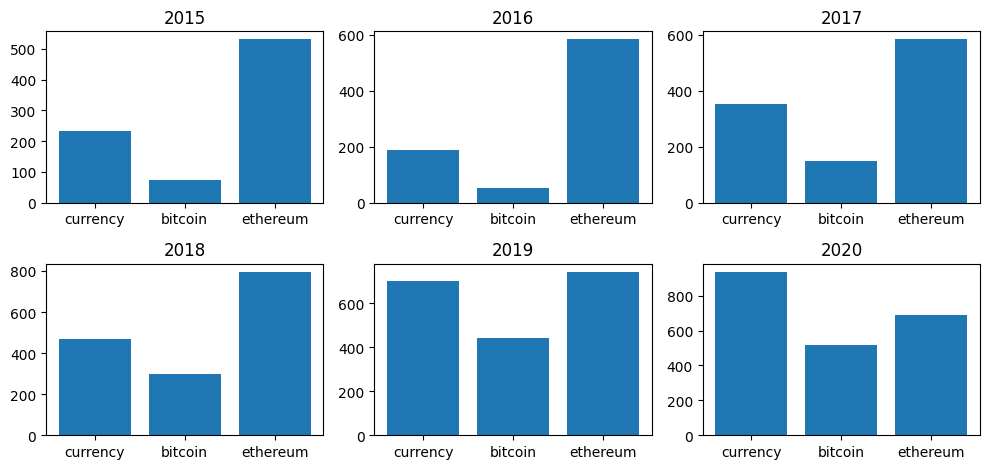

In [34]:
fig, axes = plt.subplots(2, 3)

for i, ax in enumerate(axes.flatten()):
    ax.bar(wallets.columns, wallets.iloc[i])
    ax.set_title(wallets.index[i])

    
a = plt.gcf()
a.set_figwidth(10)
plt.tight_layout()


🚀 Congratulations! You now master all the essential subplotting skills you need.

Now, move on to the next challenge.

**Only come back to the rest of this challenge, when you have finished the mandatory challenges.**

### [Optional] Custom layout

In the following code we have a third graph that we want to print along side the two barplots.

This time our layout is a bit more complex and should look like this:

<img src="https://i.ibb.co/KDTrv3X/Screen-Shot-2020-01-21-at-22-17-50.png" alt="2 row, 2 col grid, with 3 elements, one at [0,0], one at [0,1] and one at [1,[0,1]]" width=300>

In this layout the **two barplots** should be on the **top** and the **line plot** at the **bottom**.  
Change the following code to get this layout.  


<details>
    <summary>💡 Hints (only if you are stuck!)</summary>

You can build two grids on top of each other using `add_subplot` and slicing or by using `add_gridspec`
</details>

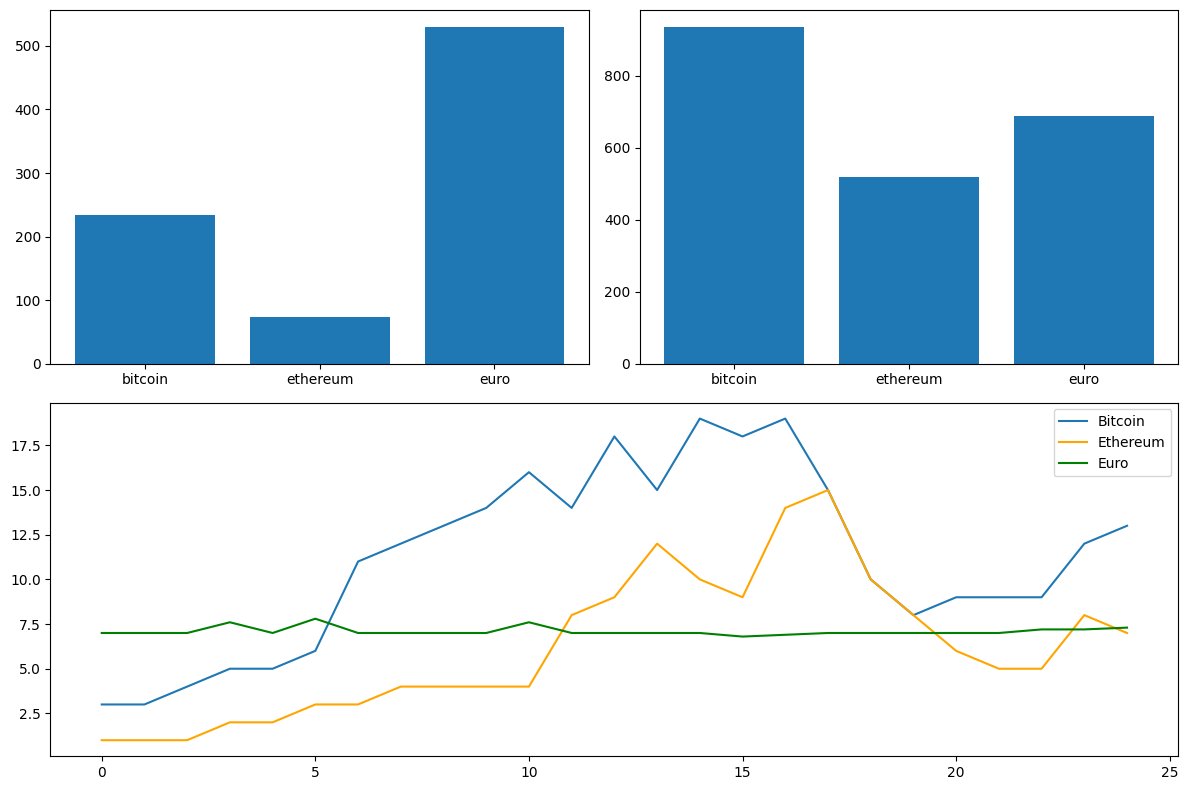

In [45]:
# Example data
bitcoin = [3, 3, 4, 5, 5, 6, 11, 12, 13, 14, 16, 14, 18, 15, 19, 18, 19, 15, 10, 8, 9, 9, 9, 12, 13]
ethereum = [1, 1, 1, 2, 2, 3, 3, 4, 4, 4, 4, 8, 9, 12, 10, 9, 14, 15, 10, 8, 6, 5, 5, 8, 7]
euro = [7, 7, 7, 7.6, 7, 7.8, 7, 7, 7, 7, 7.6, 7, 7, 7, 7, 6.8, 6.9, 7, 7, 7, 7, 7, 7.2, 7.2, 7.3]

# Create the figure
fig = plt.figure(figsize=(12, 8))

# Bar charts (top row, first and second columns)
ax1 = fig.add_subplot(2, 2, 1)  # First subplot
ax1.bar(wallet_2015["currency"], wallet_2015["value_in_euro"])

ax2 = fig.add_subplot(2, 2, 2)  # Second subplot
ax2.bar(wallet_2020["currency"], wallet_2020["value_in_euro"])

# Line plot (bottom row, spanning both columns)
ax3 = fig.add_subplot(2, 1, 2)  # Span across both columns in the second row
ax3.plot(bitcoin, label='Bitcoin')
ax3.plot(ethereum, label='Ethereum', color='orange')
ax3.plot(euro, label='Euro', color='green')
ax3.legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### [Optional] Complex layout

This time we will just create the layout with **empty axes** to quickly get to the point.<br>

The first layout that you should create is:
<img src="https://i.ibb.co/s9Yscmp/Screen-Shot-2020-01-21-at-22-17-06.png" alt="layout grid" width=300>

The second layout is:
<img src="https://i.ibb.co/3FkwzsT/Screen-Shot-2020-01-21-at-22-16-59.png" alt="layout grid 2" width=300>


<details>
  <summary>💡Hint</summary>
  <p>When the grid becomes too complex to manage, you may want to use <a src='https://matplotlib.org/stable/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.add_gridspec'>figure.add_gridspec()</a>
</p>
</details>

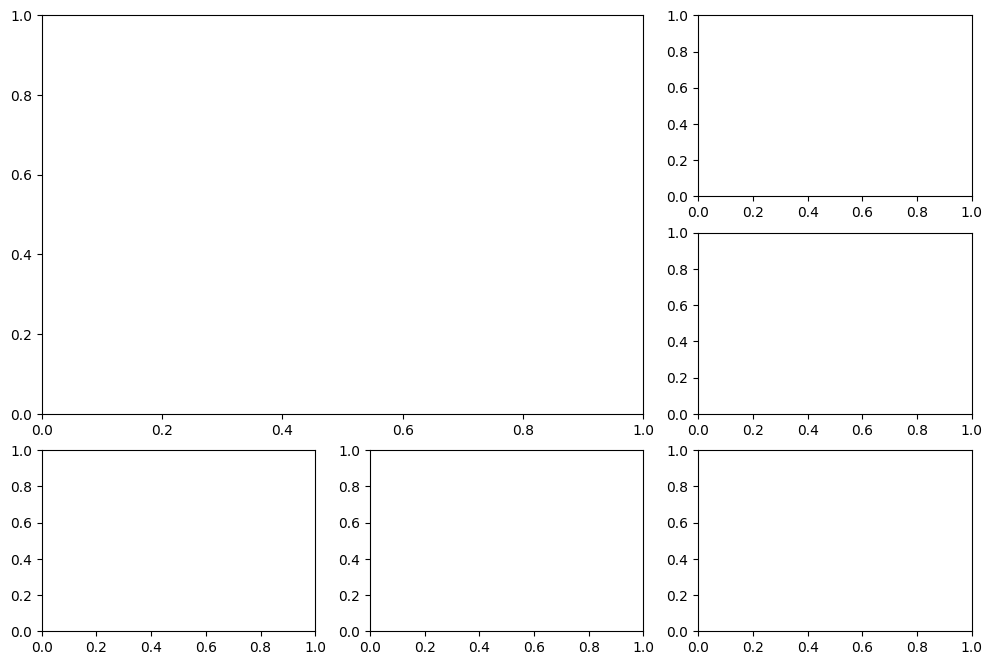

In [58]:
fig = plt.figure(figsize=(12, 8))

gs = fig.add_gridspec(3, 3)
ax1 = fig.add_subplot(gs[:2,0:2]) 
ax2 = fig.add_subplot(gs[0,2]) 
ax3 = fig.add_subplot(gs[1,2])
ax4 = fig.add_subplot(gs[2,0]) 
ax5 = fig.add_subplot(gs[2,1]) 
ax6 = fig.add_subplot(gs[2,2]) 



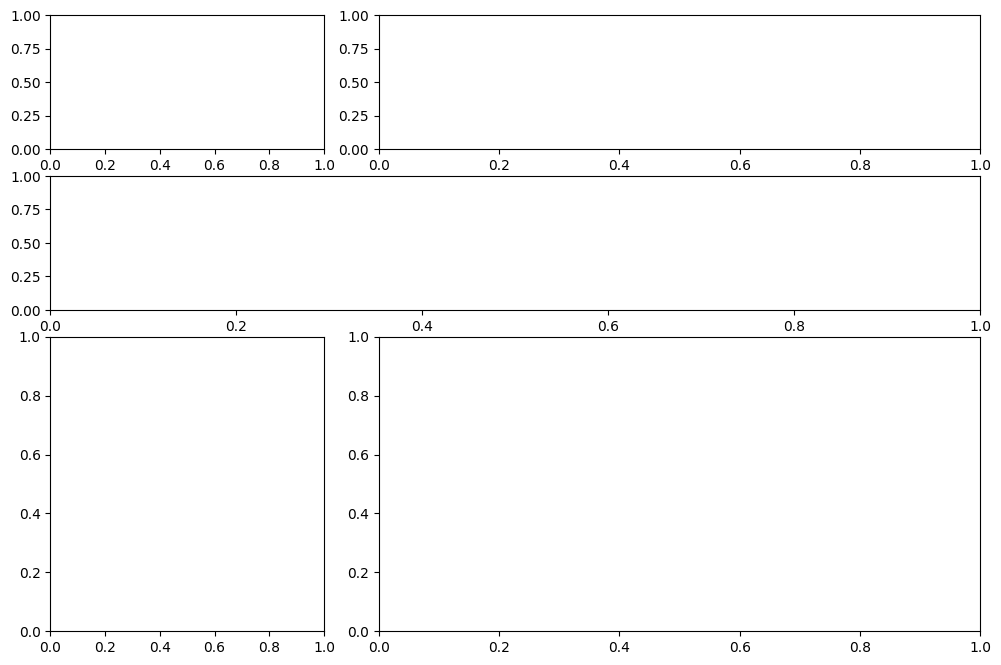

In [59]:
fig = plt.figure(figsize=(12, 8))

gs = fig.add_gridspec(4, 3)
ax1 = fig.add_subplot(gs[0,0]) 
ax2 = fig.add_subplot(gs[0,1:]) 
ax3 = fig.add_subplot(gs[1,:])
ax4 = fig.add_subplot(gs[2:,0]) 
ax5 = fig.add_subplot(gs[2:,1:]) 